In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency, f_oneway, kruskal

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# -> Para as questões de 1 a 6, utilize a base de dados ***kc_house_data.csv***

## 1 - Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço ***price*** e o número de quartos ***bedrooms***? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total ***sqft_living*** superior a 2000 pés quadrados?

In [41]:
# Carregar o dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kc_house_data6.csv")

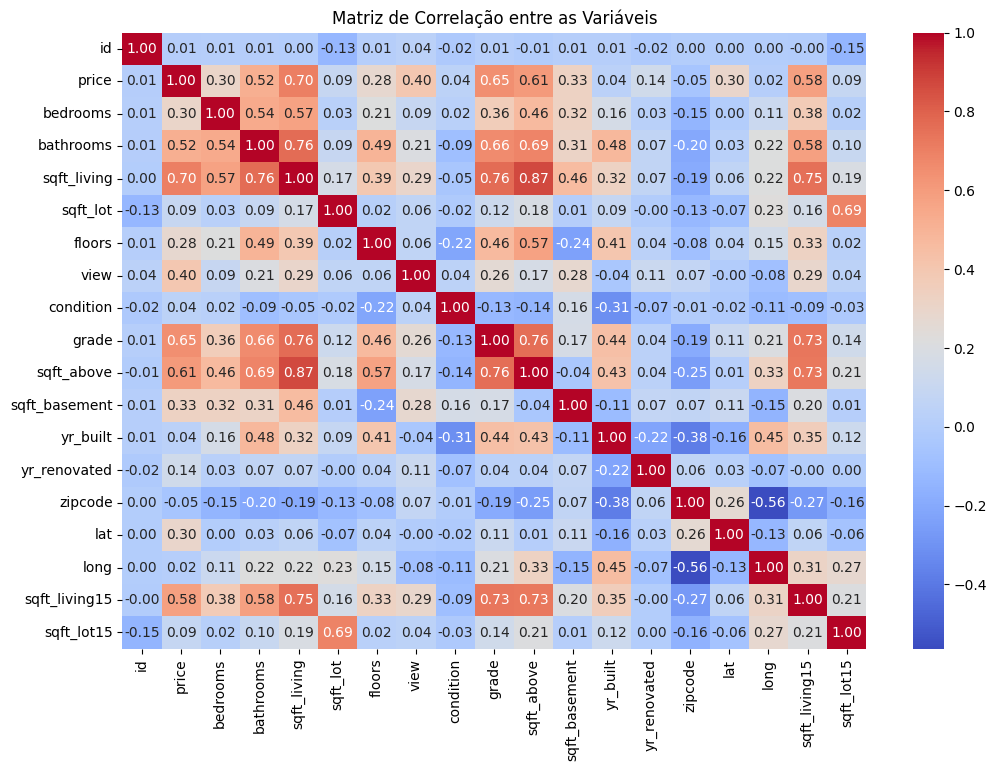

In [42]:
# Visualizar a matriz de correlação
num_houses = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_houses.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()

In [43]:
# Correlação entre o preço e o número de quartos
correlation_bedrooms_price = df['bedrooms'].corr(df['price'])
print("Correlação entre o número de quartos e o preço:", correlation_bedrooms_price)

# Filtrar casas com área total superior a 2000 pés quadrados
df_large_sqft = df[df['sqft_living'] > 2000]
correlation_bedrooms_price_large_sqft = df_large_sqft['bedrooms'].corr(df_large_sqft['price'])
print("Correlação entre o número de quartos e o preço (casas com área total > 2000 pés quadrados):", correlation_bedrooms_price_large_sqft)

Correlação entre o número de quartos e o preço: 0.299207216169182
Correlação entre o número de quartos e o preço (casas com área total > 2000 pés quadrados): 0.11912115548964147


## 2 - Existe alguma correlação entre o preço ***price*** e a área total da casa ***sqft_living***, considerando apenas casas com pelo menos dois banheiros ***bathrooms***?

In [44]:
# Correlação entre o preço e a área total da casa, considerando casas com pelo menos dois banheiros
df_min_2_bathrooms = df[df['bathrooms'] >= 2]
correlation_sqft_living_price_min_2_bathrooms = df_min_2_bathrooms['sqft_living'].corr(df_min_2_bathrooms['price'])
print("Correlação entre a área total da casa e o preço (casas com pelo menos dois banheiros):", correlation_sqft_living_price_min_2_bathrooms)

Correlação entre a área total da casa e o preço (casas com pelo menos dois banheiros): 0.7067107107996192


## 3 - Como a quantidade de banheiros ***bathrooms*** influencia na correlação entre a área total da casa ***sqft_living*** e o preço ***price***?

In [45]:
# Influência da quantidade de banheiros na correlação entre a área total da casa e o preço
correlation_sqft_living_price_all = df['sqft_living'].corr(df['price'])
correlation_sqft_living_price_min_3_bathrooms = df[df['bathrooms'] >= 3]['sqft_living'].corr(df[df['bathrooms'] >= 3]['price'])
print("Correlação entre a área total da casa e o preço (todas as casas):", correlation_sqft_living_price_all)
print("Correlação entre a área total da casa e o preço (casas com pelo menos três banheiros):", correlation_sqft_living_price_min_3_bathrooms)

Correlação entre a área total da casa e o preço (todas as casas): 0.7021990429253444
Correlação entre a área total da casa e o preço (casas com pelo menos três banheiros): 0.7158687322901117


## 4 - Qual é a relação entre a condição da casa ***condition*** e o preço ***price***, considerando apenas casas com uma área total ***sqft_living*** superior a 3000 pés quadrados?

In [46]:
# Relação entre a condição da casa e o preço, considerando apenas casas com área total superior a 3000 pés quadrados
df_large_sqft_3000 = df[df['sqft_living'] > 3000]
correlation_condition_price_large_sqft_3000 = df_large_sqft_3000['condition'].corr(df_large_sqft_3000['price'])
print("Correlação entre a condição da casa e o preço (casas com área total > 3000 pés quadrados):", correlation_condition_price_large_sqft_3000)

Correlação entre a condição da casa e o preço (casas com área total > 3000 pés quadrados): 0.10527844723732609


## 5 - Existe alguma correlação entre a localização geográfica ***lat e long*** e o preço ***price*** para casas com pelo menos três quartos ***bedrooms***?

In [47]:
# Correlação entre a localização geográfica e o preço para casas com pelo menos três quartos
correlation_lat_price_min_3_bedrooms = df[df['bedrooms'] >= 3]['lat'].corr(df[df['bedrooms'] >= 3]['price'])
correlation_long_price_min_3_bedrooms = df[df['bedrooms'] >= 3]['long'].corr(df[df['bedrooms'] >= 3]['price'])
print("Correlação entre a latitude e o preço (casas com pelo menos três quartos):", correlation_lat_price_min_3_bedrooms)
print("Correlação entre a longitude e o preço (casas com pelo menos três quartos):", correlation_long_price_min_3_bedrooms)

Correlação entre a latitude e o preço (casas com pelo menos três quartos): 0.31255514248432165
Correlação entre a longitude e o preço (casas com pelo menos três quartos): -0.0072753069929269365


## 6 - Calcule a correlação entre uma variável categórica(***waterfront***) e uma variável numérica(***price***) usando ANOVA.

In [48]:
# Função para calcular a correlação entre uma variável categórica e uma variável numérica usando ANOVA
def categorical_numerical_correlation(cat_var, num_var):
    groups = [num_var[cat_var == i] for i in cat_var.unique()]
    _, p_value = f_oneway(*groups)
    return p_value

# Exemplo de uso
waterfront = df['waterfront']
price = df['price']
p_value_waterfront_price = categorical_numerical_correlation(waterfront, price)
print("P-valor da correlação entre o bairro e o preço das casas:", p_value_waterfront_price)

P-valor da correlação entre o bairro e o preço das casas: 2.97380815121432e-202


# -> Para as questões de 7 a 11, utilize a base de dados ***car_price.csv***

In [ ]:
# Leitura do dataset
car_prices = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_price.csv")

In [ ]:
# Leitura das 5 primeiras linhas
car_prices.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
car_prices.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


## 7 - Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

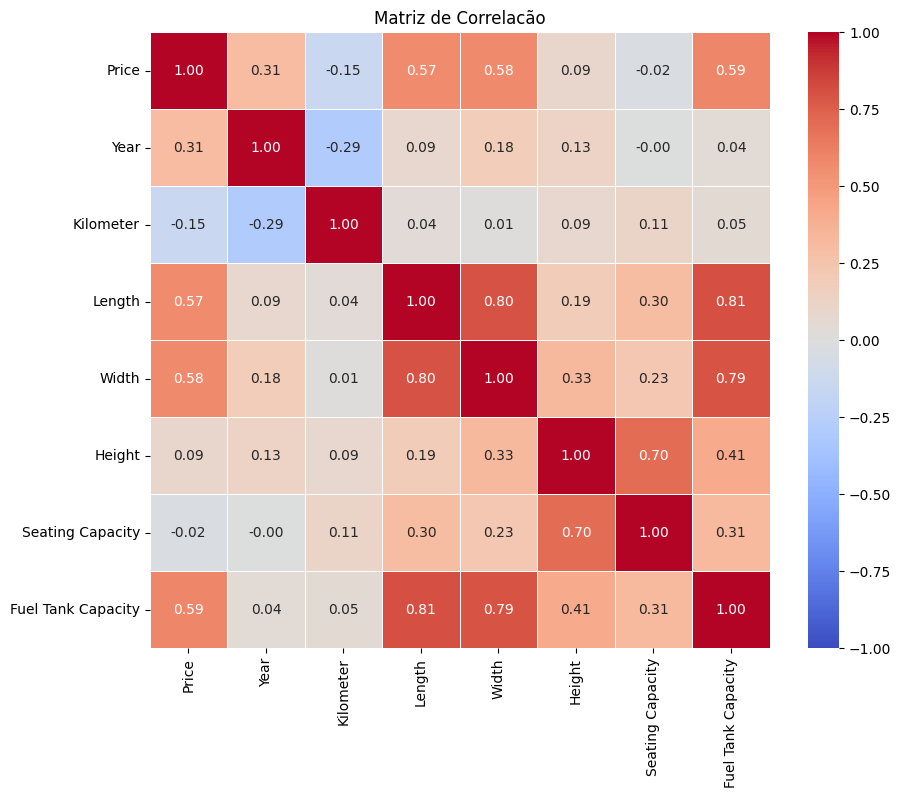

In [ ]:
# Seleciona variaveis numéricas
num_car_prices = car_prices.select_dtypes(include=['float64', 'int64'])
# Calcula a matriz de correlação
corr = num_car_prices.corr()

# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlacão')
plt.show()

In [ ]:
corr_positiva = corr[(corr['Price'] > 0.5)].index.tolist()
corr_negativa = corr[(corr['Price'] < -0.5)].index.tolist()
corr_neutra = corr[(corr['Price'] < 0.5) & (corr['Price'] > -0.5)].index.tolist()

print(f"Correlações Positivas: {corr_positiva}")
print(f"Correlações Negativas: {corr_negativa}")
print(f"Correlações Neutras: {corr_neutra}")

Correlações Positivas: ['Price', 'Length', 'Width', 'Fuel Tank Capacity']
Correlações Negativas: []
Correlações Neutras: ['Year', 'Kilometer', 'Height', 'Seating Capacity']


## 8 - Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse 'Price'.

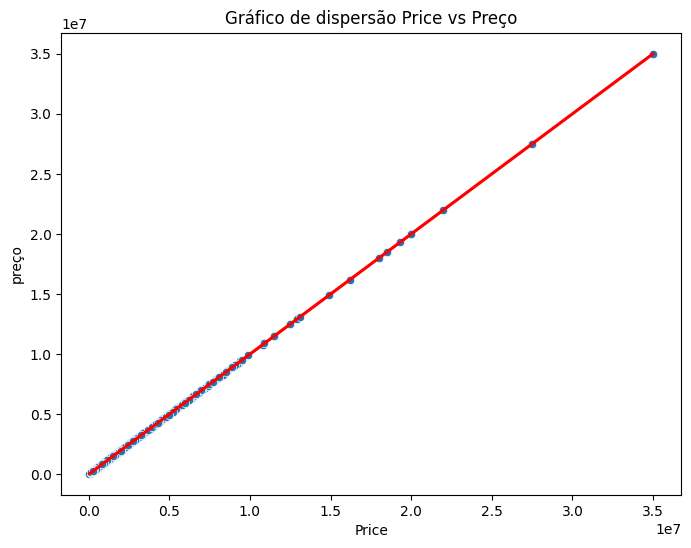

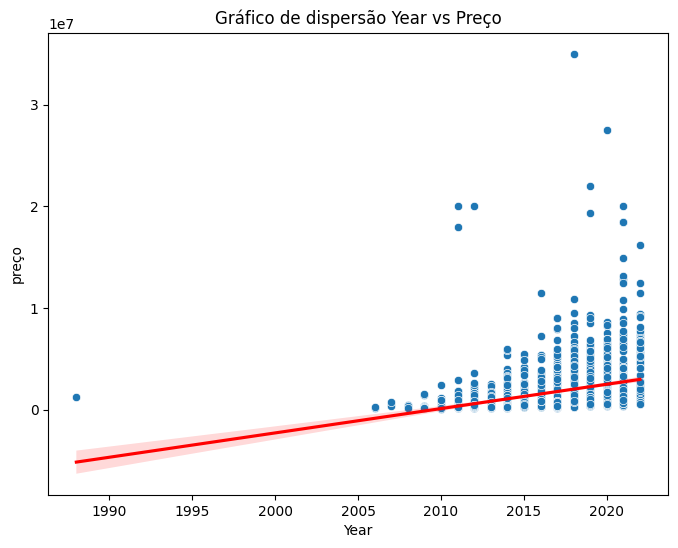

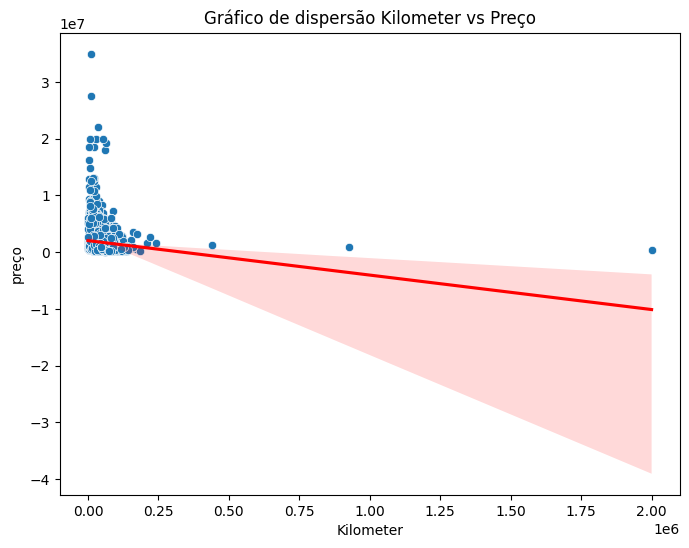

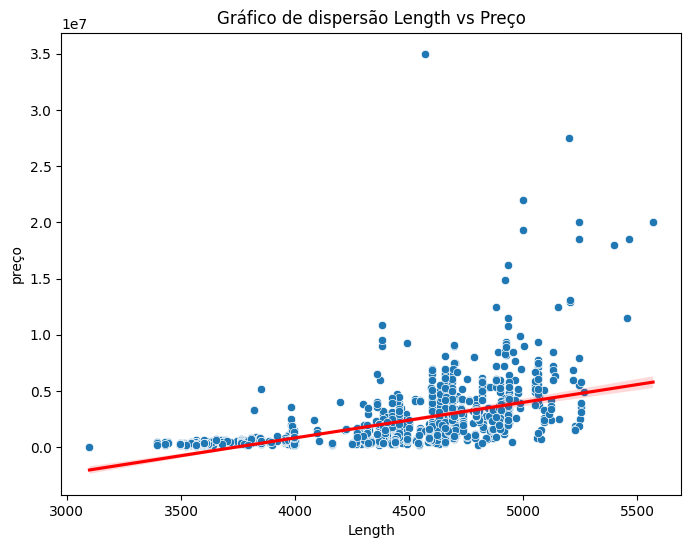

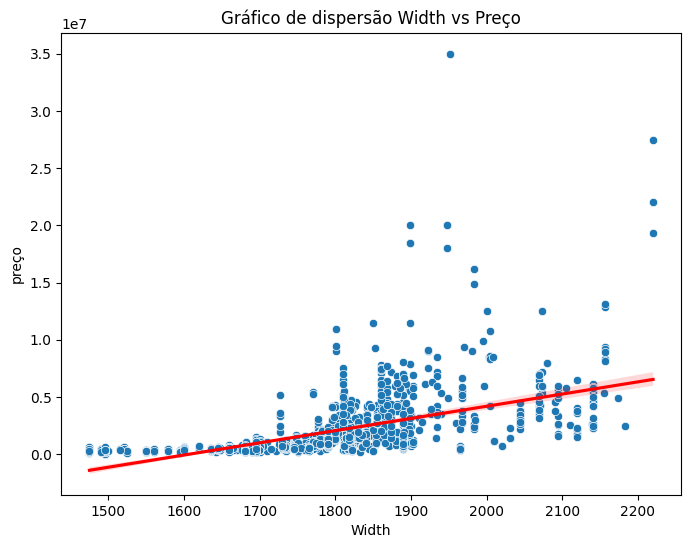

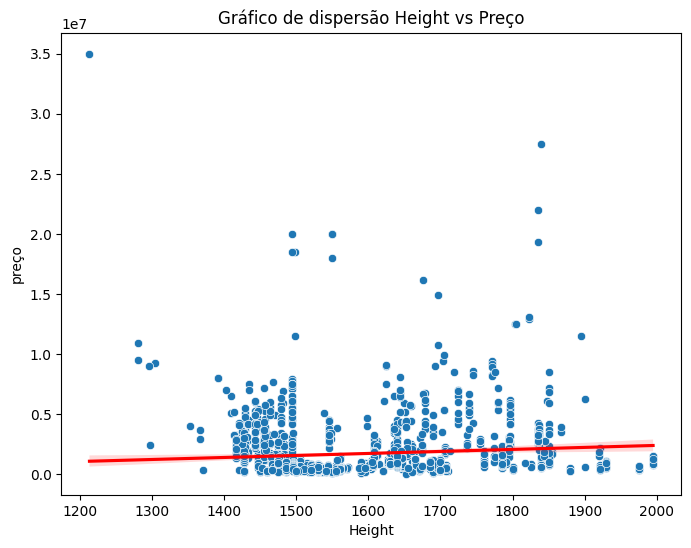

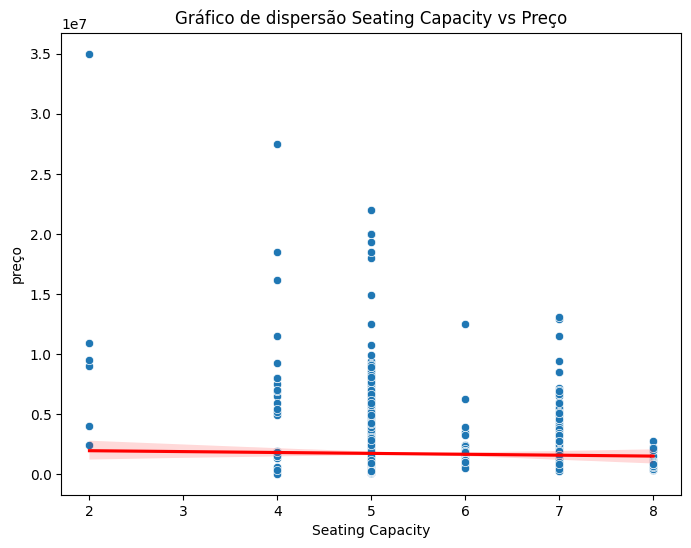

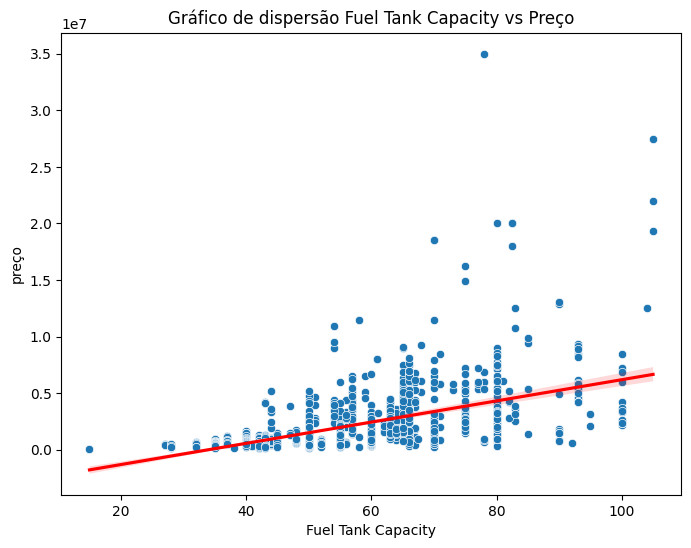

In [ ]:
# Percorrendo todas as variáveis numéricas
for column in num_car_prices.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=car_prices, x=column, y="Price")
    sns.regplot(data=car_prices, x=column, y='Price', scatter=False, color='red')
    plt.title(f'Gráfico de dispersão {column} vs Preço')
    plt.xlabel(column)
    plt.ylabel("preço")
    plt.show()

## 9 - Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [ ]:
# Adiciona uma constante
X = sm.add_constant(num_car_prices['Fuel Tank Capacity'])

# Variável de interesse
y = num_car_prices['Price']

In [ ]:
# Fit do modelo: Cálcuo dos valores de intercepto e coeficientes angular
model = sm.OLS(y, X).fit()

In [ ]:
# Tabela de Regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          2.59e-173
Time:                        17:44:24   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

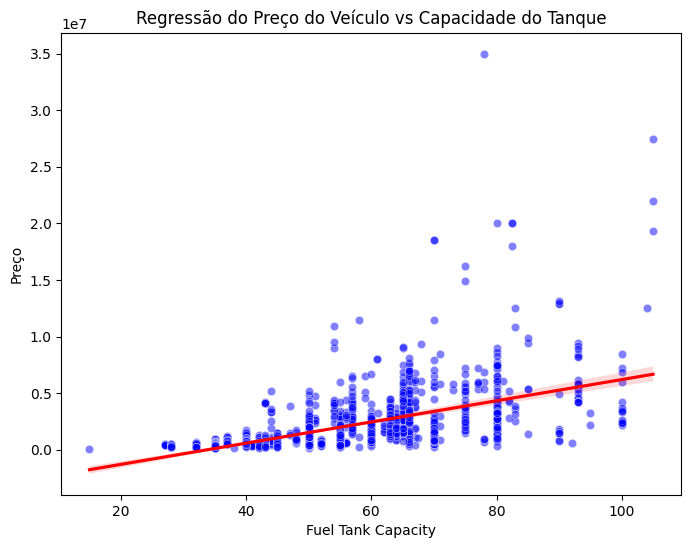

In [ ]:
# Gráfico da reta estimada

plt.figure(figsize=(8, 6))
sns.scatterplot(data=num_car_prices, x='Fuel Tank Capacity', y='Price', color='blue', alpha=0.5)

# Gráfico da Regressão entre o 'Preço' e 'Capacidade do Tanque' e o plot da reta estimada
sns.regplot(data=num_car_prices, x='Fuel Tank Capacity', y='Price', scatter=False, color='red')

plt.title('Regressão do Preço do Veículo vs Capacidade do Tanque')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Preço')

plt.show()

## 10 - Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

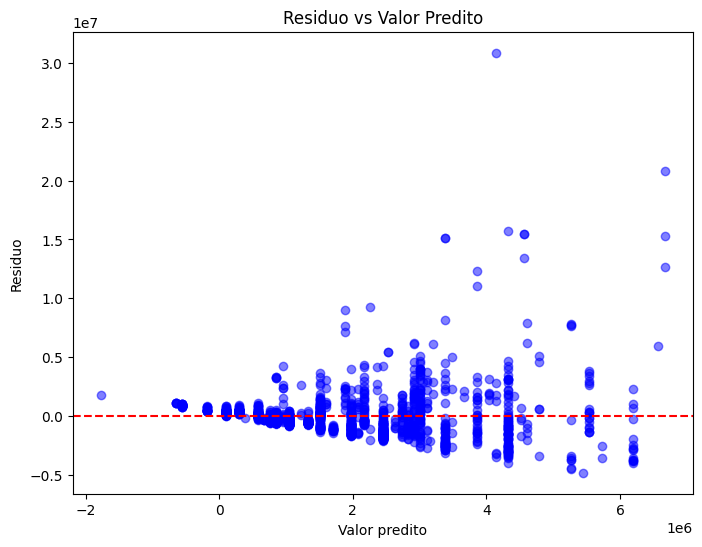

In [ ]:
# Armazena os dados dos resíduos do modelo
residuals = model.resid
# Realiza a predição do valor
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# Adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

## 11 - Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
# Seleção de variáveis com correlacão acima de 0.5 ou abaixo de -0.5
high_correlation_variables = corr[(corr['Price'] > 0.5) | (corr['Price'] < -0.5)].index.tolist()
high_correlation_variables.remove('Price')

# Variáveis selecionadas
selected_variables = ['Price'] + high_correlation_variables
selected_df = num_car_prices[selected_variables]

In [ ]:
# Fit do modelo
X = sm.add_constant(selected_df.drop(columns=['Price']))
y = selected_df['Price']
model = sm.OLS(y, X).fit()

# Tabela de Regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          2.79e-197
Time:                        17:46:22   Log-Likelihood:                -29753.
No. Observations:                1874   AIC:                         5.951e+04
Df Residuals:                    1870   BIC:                         5.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.21e+07   8.16

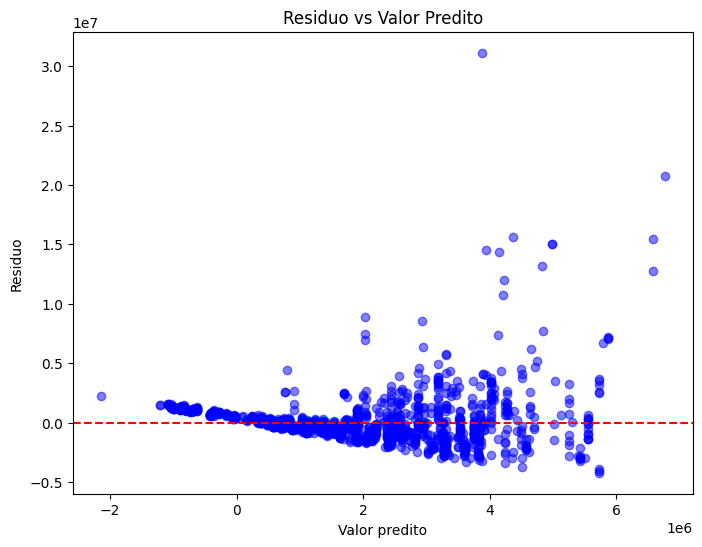

In [ ]:
# Armazena os dados dos resíduos do modelo
residuals = model.resid
# Realiza a predição do valor
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# Adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()